In [658]:
#Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [976]:
# Reading data
raw_data = pd.read_csv("D://Datahack//Loan Prediction//train.csv")
rawtest_data = pd.read_csv("D://Datahack//Loan Prediction//test.csv")

In [977]:
# Creating reference of the original data
df = raw_data.copy()
test = rawtest_data.copy()

In [978]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [979]:
df.shape

(614, 13)

In [980]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [981]:
df.isnull().sum() 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [982]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [983]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [984]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [985]:
# 3+ to replace with 3
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [986]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [987]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [988]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [989]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

# Data Preprocessing 


In [990]:
df = df.drop(['Loan_ID'],axis = 1)

In [991]:
df['Dependents'].replace('3+','3',inplace = True)
test['Dependents'].replace('3+','3',inplace = True)
df['Dependents'] = df['Dependents'].fillna(method = 'ffill')
test['Dependents'] = test['Dependents'].fillna(method = 'ffill')

In [992]:
df['Gender'] = df['Gender'].fillna(method = 'ffill')
test['Gender'] = test['Gender'].fillna(method = 'ffill')

In [993]:
df['Married'] = df['Married'].fillna(method = 'ffill')

In [994]:
df['Self_Employed'] = df['Self_Employed'].fillna(method = 'ffill')
test['Self_Employed'] = test['Self_Employed'].fillna(method = 'ffill')

In [995]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].mean())

In [996]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean())

In [997]:
df['Credit_History'] = df['Credit_History'].fillna(method = 'ffill')
test['Credit_History'] = test['Credit_History'].fillna(method = 'ffill')

In [998]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [999]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Data Visualization

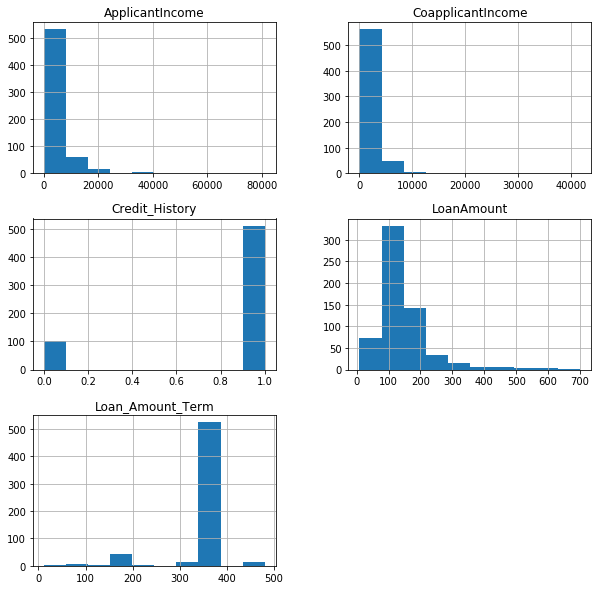

In [1000]:
df.hist(figsize = (10,10))
plt.show()

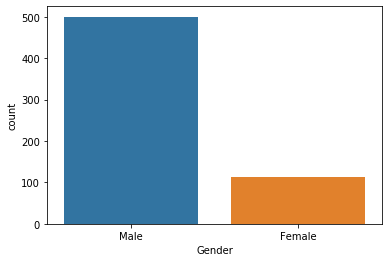

In [1001]:
sns.countplot('Gender',data = df)

In [1002]:
pd.crosstab(index = df['Gender'],columns = 'count' , normalize = True)

col_0,count
Gender,
Female,0.185668
Male,0.814332


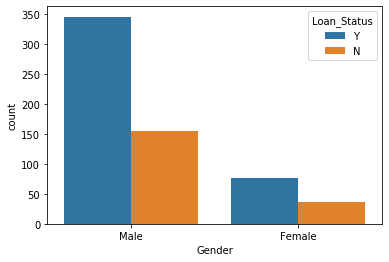

In [1003]:
sns.countplot(x = 'Gender' , data = df , hue = 'Loan_Status')

In [1004]:
pd.crosstab(index = df['Gender'] , columns = df['Loan_Status'],margins = True)

Loan_Status,N,Y,All
Gender,,,
Female,37,77,114
Male,155,345,500
All,192,422,614


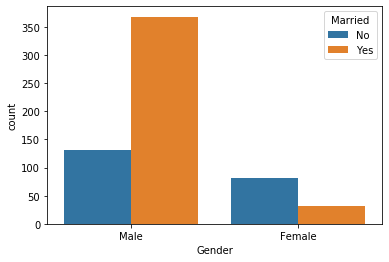

In [1005]:
sns.countplot(x = 'Gender' , data = df , hue = 'Married')

In [1006]:
pd.crosstab(index = df['Gender'] , columns = df['Married'],margins = True)

Married,No,Yes,All
Gender,,,
Female,82,32,114
Male,132,368,500
All,214,400,614


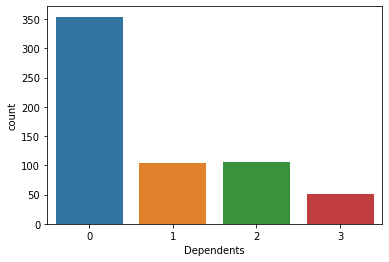

In [1007]:
sns.countplot('Dependents',data = df)

In [1008]:
pd.crosstab(index = df['Dependents'] , columns = 'count')

col_0,count
Dependents,
0,354
1,104
2,105
3,51


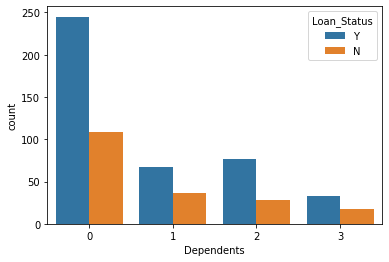

In [1009]:
sns.countplot(x = 'Dependents' , data = df , hue = 'Loan_Status')

In [1010]:
pd.crosstab(index = df['Dependents'] , columns = df['Loan_Status'] , margins = True , normalize = 'index')

Loan_Status,N,Y
Dependents,,
0,0.307910,0.692090
1,0.355769,0.644231
2,0.266667,0.733333
3,0.352941,0.647059
All,0.312704,0.687296


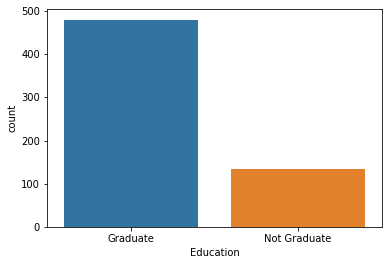

In [1011]:
sns.countplot('Education' , data = df)

In [1012]:
pd.crosstab(index = df['Education'] , columns = df['Gender'] ,margins = True)

Gender,Female,Male,All
Education,,,
Graduate,94,386,480
Not Graduate,20,114,134
All,114,500,614


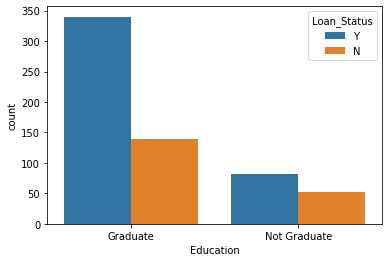

In [1013]:
sns.countplot('Education' ,data = df , hue = 'Loan_Status')

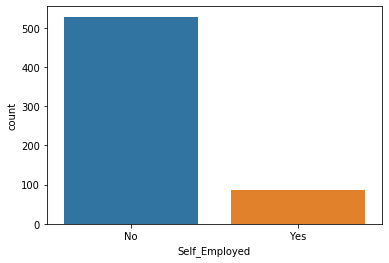

In [1014]:
sns.countplot('Self_Employed' , data= df )

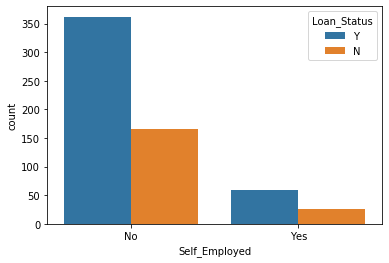

In [1015]:
sns.countplot('Self_Employed' ,data = df , hue = 'Loan_Status')

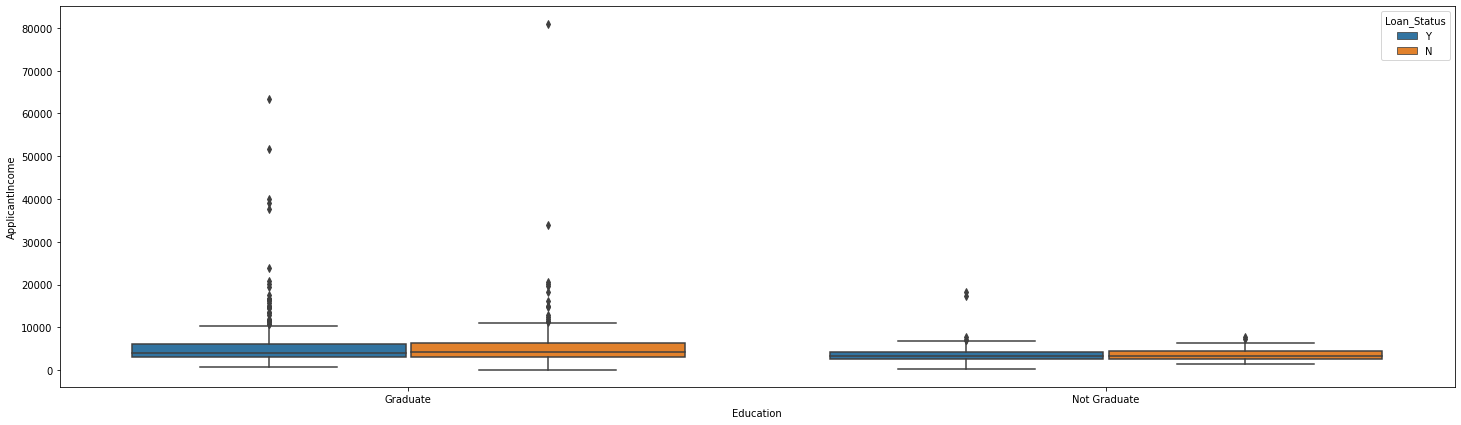

In [1016]:
plt.figure(figsize=(25,7))
sns.boxplot(x='Education',y='ApplicantIncome',hue='Loan_Status',data=df)

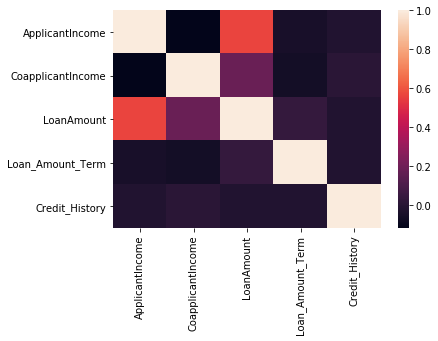

In [1017]:
sns.heatmap(df.corr())

In [1018]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240., 342., 180.,  60., 300., 480.,  36.,  84.,  12.])

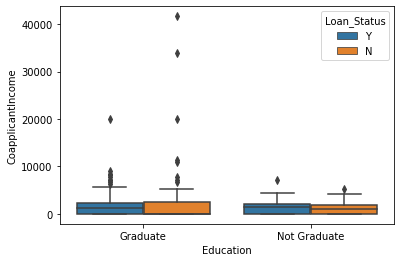

In [1019]:
sns.boxplot(x='Education',y='CoapplicantIncome',hue='Loan_Status',data=df)

In [1020]:
df['Total_income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df = df.drop(['CoapplicantIncome','ApplicantIncome'],axis = 1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,Y,6000.0


In [1021]:
test['Total_income'] = test['ApplicantIncome'] + test['CoapplicantIncome']
test = test.drop(['CoapplicantIncome','ApplicantIncome'],axis = 1)
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_income
0,LP001015,Male,Yes,0,Graduate,No,110.0,360.0,1.0,Urban,5720
1,LP001022,Male,Yes,1,Graduate,No,126.0,360.0,1.0,Urban,4576
2,LP001031,Male,Yes,2,Graduate,No,208.0,360.0,1.0,Urban,6800
3,LP001035,Male,Yes,2,Graduate,No,100.0,360.0,1.0,Urban,4886
4,LP001051,Male,No,0,Not Graduate,No,78.0,360.0,1.0,Urban,3276


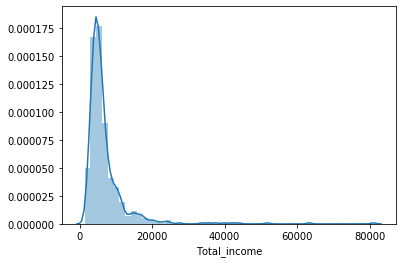

In [1022]:
sns.distplot(df['Total_income'])

In [1023]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'Total_income'],
      dtype='object')

In [1024]:
df['Married'] = df['Married'].map({'No':0,'Yes':1})
df['Gender'] = df['Gender'].map({'Female':0,'Male':1})
df['Education'] = df['Education'].map({'Graduate':0,'Not Graduate':1})
df['Self_Employed'] = df['Self_Employed'].map({'No':0,'Yes':1})
df['Property_Area'] = df['Property_Area'].map({'Urban':0,'Rural':1,'Semiurban':2})
df['Dependents'].replace('3+',3,inplace=True)
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})

In [1025]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'Total_income'],
      dtype='object')

In [1026]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,1,0,0,0,0,146.412162,360.0,1.0,0,1,5849.0
1,1,1,1,0,0,128.000000,360.0,1.0,1,0,6091.0
2,1,1,0,0,1,66.000000,360.0,1.0,0,1,3000.0
3,1,1,0,1,0,120.000000,360.0,1.0,0,1,4941.0
4,1,0,0,0,0,141.000000,360.0,1.0,0,1,6000.0


In [1027]:
test['Married'] = test['Married'].map({'No':0,'Yes':1})
test['Gender'] = test['Gender'].map({'Female':0,'Male':1})
test['Education'] = test['Education'].map({'Graduate':0,'Not Graduate':1})
test['Self_Employed'] = test['Self_Employed'].map({'No':0,'Yes':1})
test['Property_Area'] = test['Property_Area'].map({'Urban':0,'Rural':1,'Semiurban':2})
test['Dependents'].replace('3+',3,inplace=True)


In [1028]:
test= test.drop(['Loan_ID'],axis = 1)

In [1029]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
x = df.drop(['Loan_Status'],axis = 1)
y = df['Loan_Status']

In [1030]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(x,y)


In [1031]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [1032]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores

,Specs,Score
0,Gender,0.017005
1,Married,1.697853
2,Dependents,0.009325
3,Education,3.540502
4,Self_Employed,0.043097
5,LoanAmount,39.211545
6,Loan_Amount_Term,3.267315
7,Credit_History,27.854204
8,Property_Area,4.398854
9,Total_income,3559.550362


In [1033]:
print(featureScores.nlargest(7,'Score'))  

              Specs        Score
9      Total_income  3559.550362
5        LoanAmount    39.211545
7    Credit_History    27.854204
8     Property_Area     4.398854
3         Education     3.540502
6  Loan_Amount_Term     3.267315
1           Married     1.697853


In [1034]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,1,0,0,0,0,146.412162,360.0,1.0,0,1,5849.0
1,1,1,1,0,0,128.000000,360.0,1.0,1,0,6091.0
2,1,1,0,0,1,66.000000,360.0,1.0,0,1,3000.0
3,1,1,0,1,0,120.000000,360.0,1.0,0,1,4941.0
4,1,0,0,0,0,141.000000,360.0,1.0,0,1,6000.0


In [1035]:
df = df.drop(['Gender','Dependents','Self_Employed'],axis = 1)
test = test.drop(['Gender','Dependents','Self_Employed'],axis = 1)

# Model Building

In [1036]:
target = df['Loan_Status']
inputs = df.drop(['Loan_Status'],axis = 1)

In [1037]:
target.shape

(614,)

In [1038]:
inputs.shape

(614, 7)

In [1039]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(inputs)
X = scaler.transform(inputs)

In [1040]:
scaler.fit(test)
test_input = scaler.transform(test)

In [1041]:
#Splitting train data into tarin & test for building and testing model.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,target, test_size=0.2,random_state= 77)


In [1042]:
import numpy as np

print(f"Numbers of train instances by class: {np.bincount(y_train)}")
print(f"Numbers of test instances by class: {np.bincount(y_test)}")

Numbers of train instances by class: [152 339]
Numbers of test instances by class: [40 83]


## Random Forest

In [1048]:
#Model 1 RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_class = RandomForestClassifier(n_estimators= 221,min_samples_split= 49,max_depth= 3)
rf_class.fit(x_train,y_train)
y_pred=rf_class.predict(x_test)

In [1049]:
rf_class.score(x_test,y_test)

0.8048780487804879

In [1050]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.11084337349397577

In [1046]:
from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators':range(1,2000,5),
         'max_depth':range(1,200,2),
         'min_samples_split':range(2,50,1)}
rand_search = RandomizedSearchCV(rf_class, param_distributions=params, n_jobs=-1, cv=11)
rand_search.fit(x_train, y_train)
rand_search.best_score_
 

C:\Users\suyog\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8065173116089613

In [1047]:
rand_search.best_params_

{'n_estimators': 221, 'min_samples_split': 49, 'max_depth': 3}

## Gradient boost


In [947]:
from sklearn.ensemble import GradientBoostingClassifier

In [948]:
clf = GradientBoostingClassifier()
clf.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [949]:
clf.score(x_test,y_test)

0.8130081300813008

In [950]:
y_pred = clf.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.1364468864468863

In [845]:
# Hyperparameter tunning
from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators':range(1,200,10),
         'max_depth':range(5,40,10),
         }
rand_search = RandomizedSearchCV(clf, param_distributions=params, n_jobs=-1, cv=11)
rand_search.fit(x_train, y_train)
rand_search.best_score_
 

C:\Users\suyog\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.7556008146639511

In [846]:
rand_search.best_params_
 

{'n_estimators': 161, 'max_depth': 5}

## Ada Boost

In [951]:
from sklearn.ensemble import AdaBoostClassifier

In [952]:
Ada_class = AdaBoostClassifier()


In [953]:
Ada_class.fit(x_train,y_train)
Ada_class.score(x_test,y_test)

0.7804878048780488

In [954]:
y_pred = Ada_class.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.01373626373626391

In [851]:
# Hyperparameter tunning
from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators':range(1,1000,2)}
rand_search = RandomizedSearchCV(Ada_class, param_distributions=params, n_jobs=-1, cv=11)
rand_search.fit(x_train, y_train)
rand_search.best_score_
 

C:\Users\suyog\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.7474541751527495

In [852]:
rand_search.best_params_

{'n_estimators': 307}

# Logistic regression

In [1051]:
from sklearn.linear_model import LogisticRegression

In [1052]:
lr_model = LogisticRegression()

In [1053]:
lr_model.fit(x_train,y_train)

C:\Users\suyog\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [1054]:
lr_model.score(x_test,y_test)

0.8048780487804879

In [1055]:
y_pred= lr_model.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.11084337349397577

In [1056]:
from sklearn.model_selection import RandomizedSearchCV
params = {'C':range(1,2000,1)}
rand_search = RandomizedSearchCV(lr_model, param_distributions=params, n_jobs=-1, cv=5)
rand_search.fit(x_train, y_train)
rand_search.best_score_
 

C:\Users\suyog\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8024439918533605

In [1057]:
rand_search.best_params_

{'C': 1085}

## Making final model

In [1058]:
y_predict = rf_class.predict(x_test)

In [1059]:
rf_class.score(x_test,y_test)

0.8048780487804879

In [1060]:
status = rf_class.predict(test)

In [1061]:
pred = pd.DataFrame(status)
sub_df = pd.read_csv('D://Datahack//Loan Prediction//sample_submission_49d68Cx.csv')
datasets = pd.concat([sub_df['Loan_ID'],pred],axis = 1)
datasets.columns = ['Loan_ID','Loan_Status']
datasets.to_csv("D://Datahack//Loan Prediction//sample_submission_49d68Cx.csv",index=False)

In [1062]:
dff = pd.read_csv("D://Datahack//Loan Prediction//sample_submission_49d68Cx.csv")
dff.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,0


In [1063]:
dff['Loan_Status'] = dff['Loan_Status'].map({1:'Y',0:'N'})

In [1064]:
dff.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


In [1065]:
dff.to_csv("D://Datahack//Loan Prediction//sample_submission_49d68Cx.csv",index=False)